<a href="https://colab.research.google.com/github/nyulnyul/FootballValues/blob/main/footballvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
#최초 1회 실행
!sudo apt-get install fonts-nanum


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,182 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [2]:
!rm ~/.cache/matplotlib -rf

In [3]:
#pip install pandas openpyxl
#최초 1회 실행


#데이터 전처리 과정

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

# 폰트 설치 경로 확인
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# 폰트 설정
mpl.rcParams['font.family'] = 'NanumBarunGothic'

# 음수 부호 정상 출력을 위한 설정
mpl.rcParams['axes.unicode_minus'] = False


In [5]:
import pandas as pd
import os


from google.colab import drive

In [6]:
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/FootballValues/football.xlsx'

!git clone https://github.com/nyulnyul/FootballValues.git '/content/drive/My Drive/FootballValues'



Mounted at /content/drive
fatal: destination path '/content/drive/My Drive/FootballValues' already exists and is not an empty directory.


##파일 존재 여부 파악

파일이 존재합니다.
파일이 성공적으로 불러와졌습니다.
   Unnamed: 0               name                   full_name  age  height  \
0         201    Aaron Cresswell     Aaron William Cresswell   33    1.70   
1         417       Aaron Hickey       Aaron Buchanan Hickey   20    1.85   
2          56     Aaron Ramsdale  Aaron Christopher Ramsdale   25    1.90   
3        2212       Aaron Ramsey          Aaron James Ramsey   32    1.78   
4         122  Aaron Wan-Bissaka                         NaN   25    1.83   

         nationality place_of_birth  price  max_price  \
0            England      Liverpool    2.5       12.0   
1           Scotland        Glasgow   18.0       18.0   
2            England     Chesterton   38.0       38.0   
3              Wales     Caerphilly    3.0       45.0   
4  England  DR Congo         London   22.0       40.0   

                      position  ...  Per 90 Minutes.4_G+A-PK  \
0         Defender - Left-Back  ...                     0.10   
1         Defender - Left-Back  ... 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


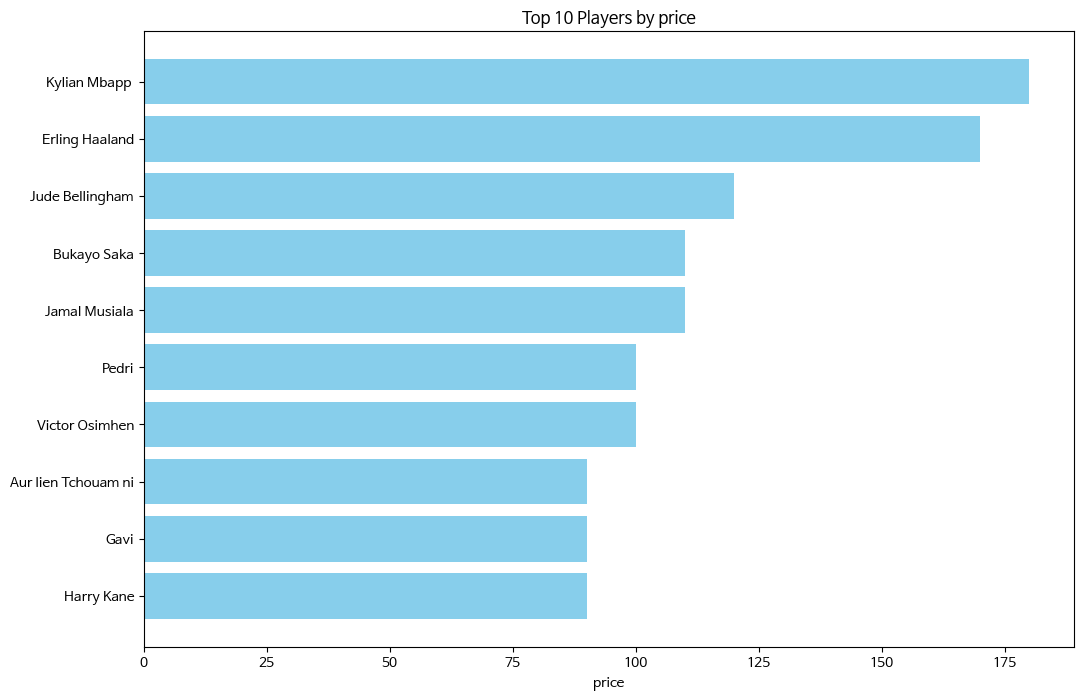

In [7]:
if os.path.exists(file_path):
    print("파일이 존재합니다.")
    try:
        # Excel 파일 불러오기
        df = pd.read_excel(file_path)
        print("파일이 성공적으로 불러와졌습니다.")

        # 데이터의 첫 몇 줄을 확인하여 구조 파악
        print(df.head())

        # 결측값 처리
        print("결측값 처리 전 각 열의 결측값 수:")
        print(df.isnull().sum())
        df.fillna(0, inplace=True)

        # 가장 높은 시장 가치를 가진 선수 찾기
        max_value_player = df.loc[df['price'].idxmax()]  # price 열을 사용하여 가장 높은 시장 가치를 가진 선수를 찾음
        print("가장 높은 시장 가치를 지닌 선수 정보:")
        print(max_value_player)

        # 시장 가치 상위 10명의 선수 시각화
        top_10_players = df.nlargest(10, 'price')  # 시장 가치 상위 10명의 선수를 찾음

        plt.figure(figsize=(12, 8))
        plt.barh(top_10_players['Player'], top_10_players['price'], color='skyblue')  #시장 가치를 시각화
        plt.xlabel('price')
        plt.title('Top 10 Players by price')
        plt.gca().invert_yaxis()
        plt.show()

    except Exception as e:
        print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 2210 non-null   int64         
 1   name                       2210 non-null   object        
 2   full_name                  2210 non-null   object        
 3   age                        2210 non-null   int64         
 4   height                     2210 non-null   float64       
 5   nationality                2210 non-null   object        
 6   place_of_birth             2210 non-null   object        
 7   price                      2210 non-null   float64       
 8   max_price                  2210 non-null   float64       
 9   position                   2210 non-null   object        
 10  shirt_nr                   2210 non-null   int64         
 11  foot                       2210 non-null   object        
 12  club  

In [9]:
df.columns = [
    '인덱스', '이름', '전체 이름', '나이', '키', '국적', '출생지', '이적료', '최고 이적료',
    '포지션', '등번호', '주발', '클럽', '계약 만료일', '클럽 가입일', '에이전트', '용품업체',
    '리그', '선수', '국가', '포지션', '나이.1', '출전 시간_MP', '출전 시간.1_선발', '출전 시간.2_분',
    '출전 시간.3_90분', '성적_득점', '성적.1_도움', '성적.2_득점+도움', '성적.3_필드골 (페널티 제외)',
    '성적.4_페널티 득점', '성적.5_페널티 시도', '성적.6_경고 (옐로 카드)', '성적.7_퇴장 (레드 카드)',
    '기대 득점_xG', '기대 득점.1_npxG', '기대 도움_xAG', '기대 득점+기대 도움_npxG+xAG',
    '공 진척_PrgC', '패스 진척_PrgP', '달리기 진척_PrgR', '90분당 득점', '90분당 도움',
    '90분당 득점+도움', '90분당 필드골 (페널티 제외)', '90분당 득점+도움 (페널티 제외)',
    '90분당 기대 득점', '90분당 기대 도움', '90분당 기대 득점+도움', '90분당 기대 득점 (페널티 제외)',
    '90분당 기대 득점+기대 도움 (페널티 제외)', '출전 경기 수_MP', '출전 시간_선발',
    '출전 시간.1_분', '출전 시간.2_90분'
]

# 데이터프레임 확인
print(df.head())


    인덱스                 이름                       전체 이름  나이     키  \
0   201    Aaron Cresswell     Aaron William Cresswell  33  1.70   
1   417       Aaron Hickey       Aaron Buchanan Hickey  20  1.85   
2    56     Aaron Ramsdale  Aaron Christopher Ramsdale  25  1.90   
3  2212       Aaron Ramsey          Aaron James Ramsey  32  1.78   
4   122  Aaron Wan-Bissaka                           0  25  1.83   

                  국적         출생지   이적료  최고 이적료                          포지션  \
0            England   Liverpool   2.5    12.0         Defender - Left-Back   
1           Scotland     Glasgow  18.0    18.0         Defender - Left-Back   
2            England  Chesterton  38.0    38.0                   Goalkeeper   
3              Wales  Caerphilly   3.0    45.0  midfield - Central Midfield   
4  England  DR Congo      London  22.0    40.0        Defender - Right-Back   

   ...  90분당 득점+도움 (페널티 제외) 90분당 기대 득점 90분당 기대 도움 90분당 기대 득점+도움  \
0  ...                 0.10       0.03       0.06

In [10]:
# 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

## 이상치 필터링

In [11]:
 #IQR을 이용한 이상치 처리
Q1 = numeric_df.quantile(0.25)  # 25번째 백분위수 (하위 사분위수)
Q3 = numeric_df.quantile(0.75)  # 75번째 백분위수 (상위 사분위수)
IQR = Q3 - Q1  # Interquartile Range (IQR)

# 이상치의 하한 및 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 포함하는 조건
outliers_condition = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 이상치가 있는 행을 필터링하여 확인
print("이상치가 있는 행:")
print(df[outliers_condition.any(axis=1)])

# 이상치를 제거 (선택 사항)
df_cleaned = df[~outliers_condition.any(axis=1)]


이상치가 있는 행:
       인덱스                 이름                       전체 이름  나이     키  \
1      417       Aaron Hickey       Aaron Buchanan Hickey  20  1.85   
2       56     Aaron Ramsdale  Aaron Christopher Ramsdale  25  1.90   
3     2212       Aaron Ramsey          Aaron James Ramsey  32  1.78   
4      122  Aaron Wan-Bissaka                           0  25  1.83   
7     2519      Abdallah Sima          Abdallah Dipo Sima  21  1.88   
...    ...                ...                         ...  ..   ...   
2199  1991    Ángel Rodríguez   Ángel Luis Rodríguez Díaz  36  1.71   
2200  1176            Éderson                           0  23  1.83   
2202  1709     Étienne Capoue                           0  34  1.89   
2207  1959        Óscar Trejo           Óscar Guido Trejo  35  1.80   
2209  1757    Óscar de Marcos       Óscar de Marcos Arana  34  1.82   

                      국적                     출생지   이적료  최고 이적료  \
1               Scotland                 Glasgow  18.0    18.0   
2   

# 데이터 모델링

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:

# 종속 변수와 독립 변수 설정
X = df_cleaned.drop(['이적료'], axis=1).select_dtypes(include=['float64', 'int64'])  # 이적료를 제외한 숫자형 변수들
y = df_cleaned['이적료']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")

# 회귀 계수 출력
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



평균 제곱 오차 (MSE): 17.06209006094088
결정 계수 (R^2): 0.6288053264078616
                            Coefficient
인덱스                       -4.042837e-04
나이                        -4.960184e-01
키                          2.566906e-01
최고 이적료                     5.463842e-01
등번호                       -3.615070e-02
나이.1                       6.798653e-02
출전 시간_MP                   5.630401e-08
출전 시간.1_선발                 3.803916e-08
출전 시간.2_분                 -3.720641e-09
출전 시간.3_90분               -3.402251e-08
성적_득점                      3.155365e-01
성적.1_도움                   -2.913626e-01
성적.2_득점+도움                 2.417382e-02
성적.3_필드골 (페널티 제외)          3.155365e-01
성적.4_페널티 득점                6.623633e-09
성적.5_페널티 시도                1.539788e-09
성적.6_경고 (옐로 카드)            4.508651e-02
성적.7_퇴장 (레드 카드)           -6.505410e-10
기대 득점_xG                  -6.144213e+01
기대 득점.1_npxG               5.228305e+01
기대 도움_xAG                 -8.519699e+00
기대 득점+기대 도움_npxG+xAG       8.567095e+00
공 진척_PrgC     

In [14]:
pip install statsmodels


In [15]:
import statsmodels.api as sm

# 종속 변수와 독립 변수 설정
X = df_cleaned.drop(['이적료'], axis=1).select_dtypes(include=['float64', 'int64'])  # 이적료를 제외한 숫자형 변수들
y = df_cleaned['이적료']

# statsmodels는 상수 항을 명시적으로 추가해야 함
X = sm.add_constant(X)

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성 및 학습
model = sm.OLS(y_train, X_train).fit()

# 모델 요약 정보 출력
print(model.summary())

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")

                            OLS Regression Results                            
Dep. Variable:                    이적료   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.12e-197
Time:                        15:01:21   Log-Likelihood:                -2358.1
No. Observations:                 873   AIC:                             4774.
Df Residuals:                     844   BIC:                             4913.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

평균 제곱 오차 (MSE): 17.06209006094088
MSE 값은 모델의 예측 값과 실제 값 사이의 평균 제곱 오차를 나타냅니다. 값이 작을수록 모델의 예측이 실제 값에 가깝다는 것을 의미합니다.

결정 계수 (R²): 0.6288053264078616
R² 값은 모델이 종속 변수의 변동성을 얼마나 설명하는지를 나타냅니다. 0.6288은 약 62.88%의 변동성을 설명할 수 있다는 의미로, 중간 정도의 설명력을 가집니다.

회귀 계수 (Coefficient):
각 독립 변수의 회귀 계수는 해당 변수가 종속 변수에 미치는 영향을 나타냅니다. 양수인 경우 종속 변수에 긍정적인 영향을, 음수인 경우 부정적인 영향을 미칩니다.

나이의 계수는 -0.4960184로, 나이가 많을수록 종속 변수는 감소하는 경향이 있습니다.
키의 계수는 0.2566906으로, 키가 클수록 종속 변수는 증가하는 경향이 있습니다.
최고 이적료의 계수는 0.5463842로, 최고 이적료가 높을수록 종속 변수는 증가하는 경향이 있습니다.

특이한 점:
기대 득점_xG의 계수는 -61.44213, 기대 득점.1_npxG의 계수는 52.28305로, 서로 상반된 영향을 미치는 것으로 보입니다.
90분당 기대 득점의 계수는 536.4857, 90분당 기대 득점 (페널티 제외)의 계수는 -511.8018로, 큰 값의 양과 음의 영향이 나타납니다.

특정 변수 해석:
출전 시간_MP, 출전 시간.1_선발, 출전 시간.2_분, 출전 시간.3_90분 등 출전 시간 관련 변수들이 종속 변수에 미치는 영향은 매우 작거나 무시할 수 있는 수준입니다.
성적_득점, 성적.3_필드골 (페널티 제외)는 종속 변수에 긍정적인 영향을 미치며, 성적.1_도움은 부정적인 영향을 미칩니다.
기대 득점+기대 도움_npxG+xAG는 종속 변수에 긍정적인 영향을 미치는 반면, 기대 도움_xAG는 부정적인 영향을 미칩니다.

#EDA 상관분석
- 피어슨 상관 계수 이용 독립변수와 이적료 간 상관관계 파악

## 피어슨 상관 분석

In [16]:

# 상관 분석
corr = numeric_df.corr(method='pearson')

# 상관 계수 행렬 출력
print(corr)

                                인덱스        나이         키       이적료    최고 이적료  \
인덱스                        1.000000  0.020595 -0.114118 -0.302172 -0.292231   
나이                         0.020595  1.000000  0.092996 -0.142824  0.107276   
키                         -0.114118  0.092996  1.000000 -0.007252 -0.022637   
이적료                       -0.302172 -0.142824 -0.007252  1.000000  0.808954   
최고 이적료                    -0.292231  0.107276 -0.022637  0.808954  1.000000   
등번호                        0.040554 -0.188311 -0.027148 -0.087385 -0.100413   
나이.1                       0.049518  0.929364  0.082936 -0.195722  0.035016   
출전 시간_MP                  -0.029573  0.133694 -0.000686  0.059307  0.115922   
출전 시간.1_선발                -0.037881  0.157187  0.006265  0.060214  0.118372   
출전 시간.2_분                 -0.036978  0.154607  0.007184  0.059815  0.118529   
출전 시간.3_90분               -0.036960  0.154620  0.007172  0.059816  0.118515   
성적_득점                     -0.046288  0.191378 -0.042

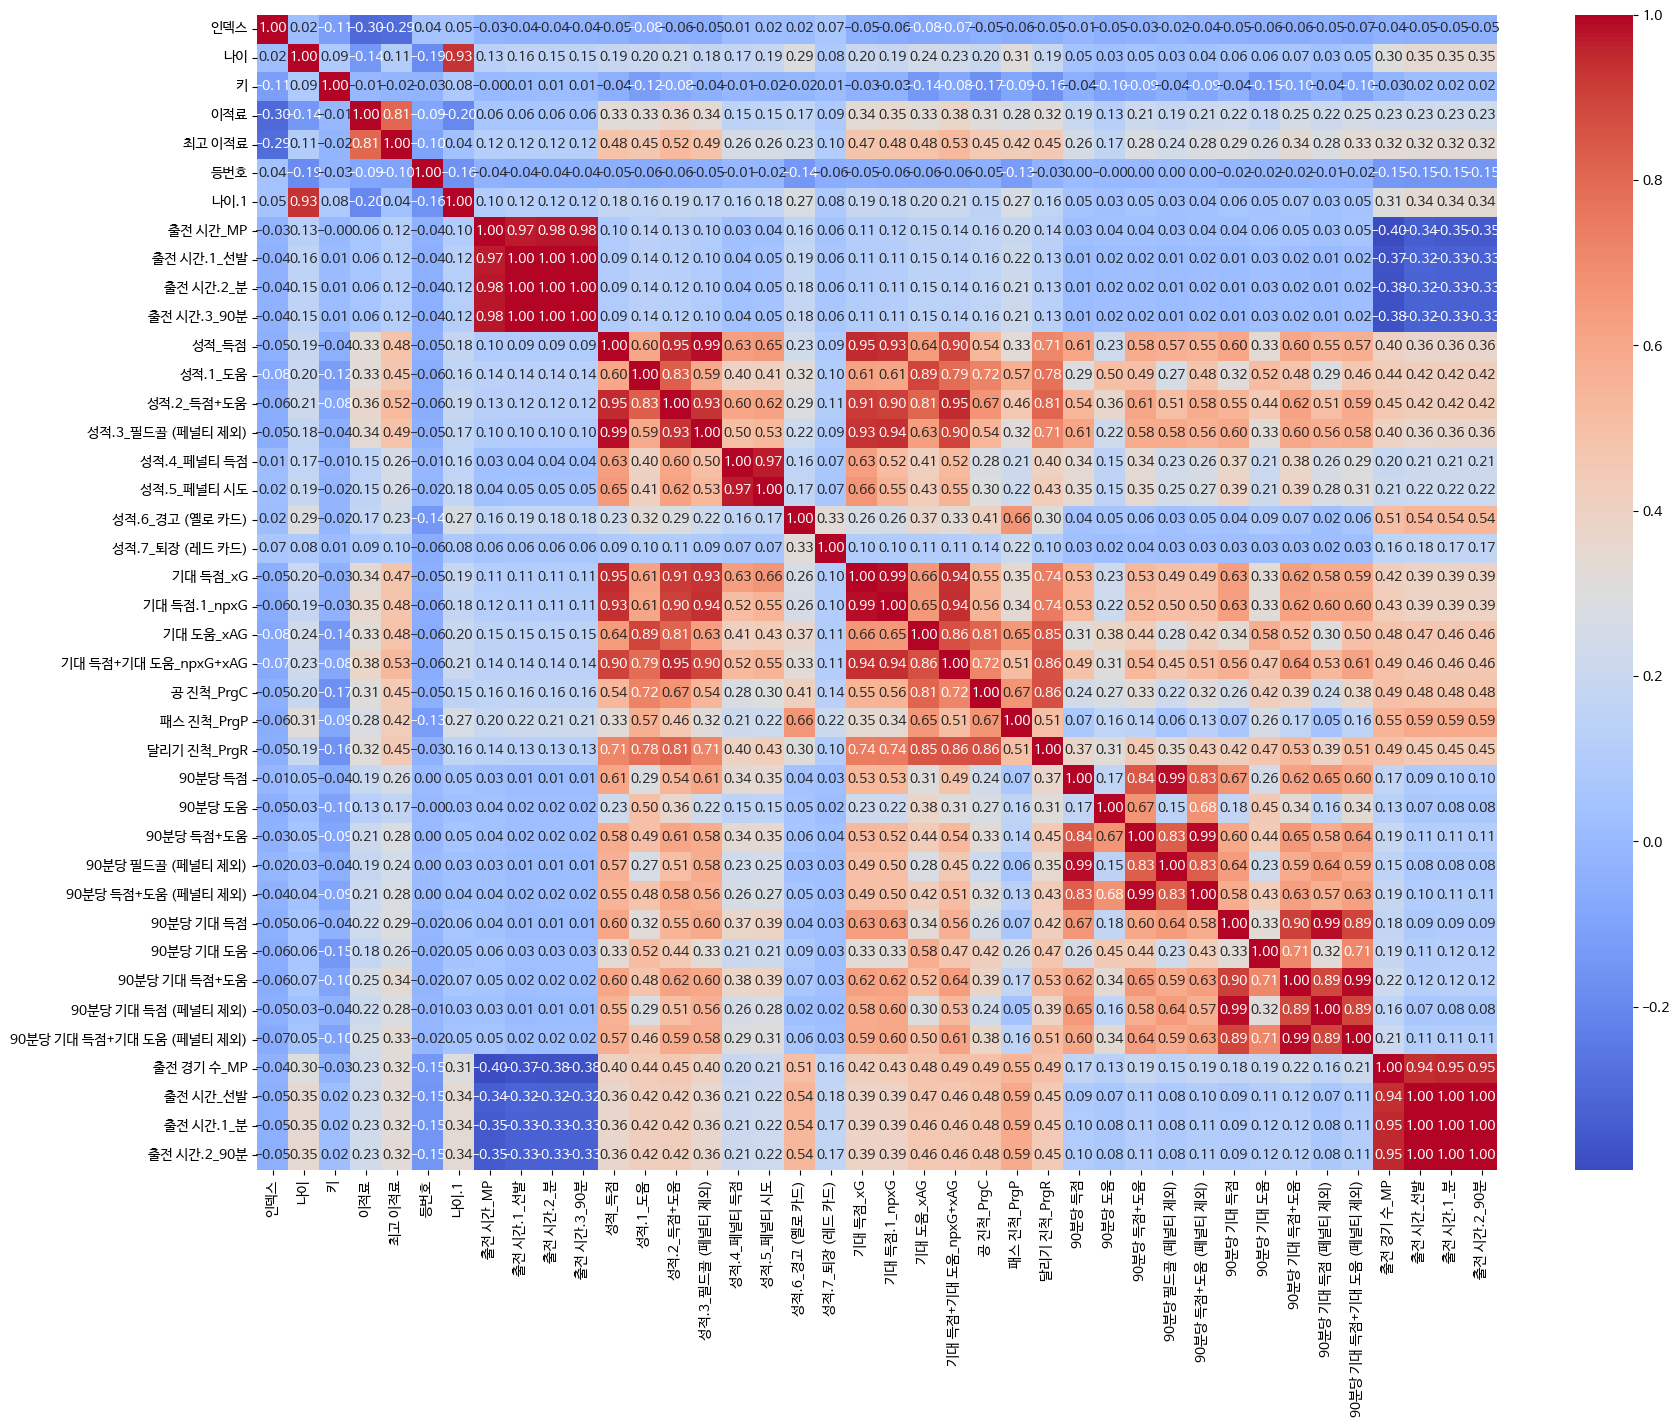

In [17]:
# 상관 계수 행렬 시각화
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                    이적료   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.12e-197
Time:                        15:35:13   Log-Likelihood:                -2358.1
No. Observations:                 873   AIC:                             4774.
Df Residuals:                     844   BIC:                             4913.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

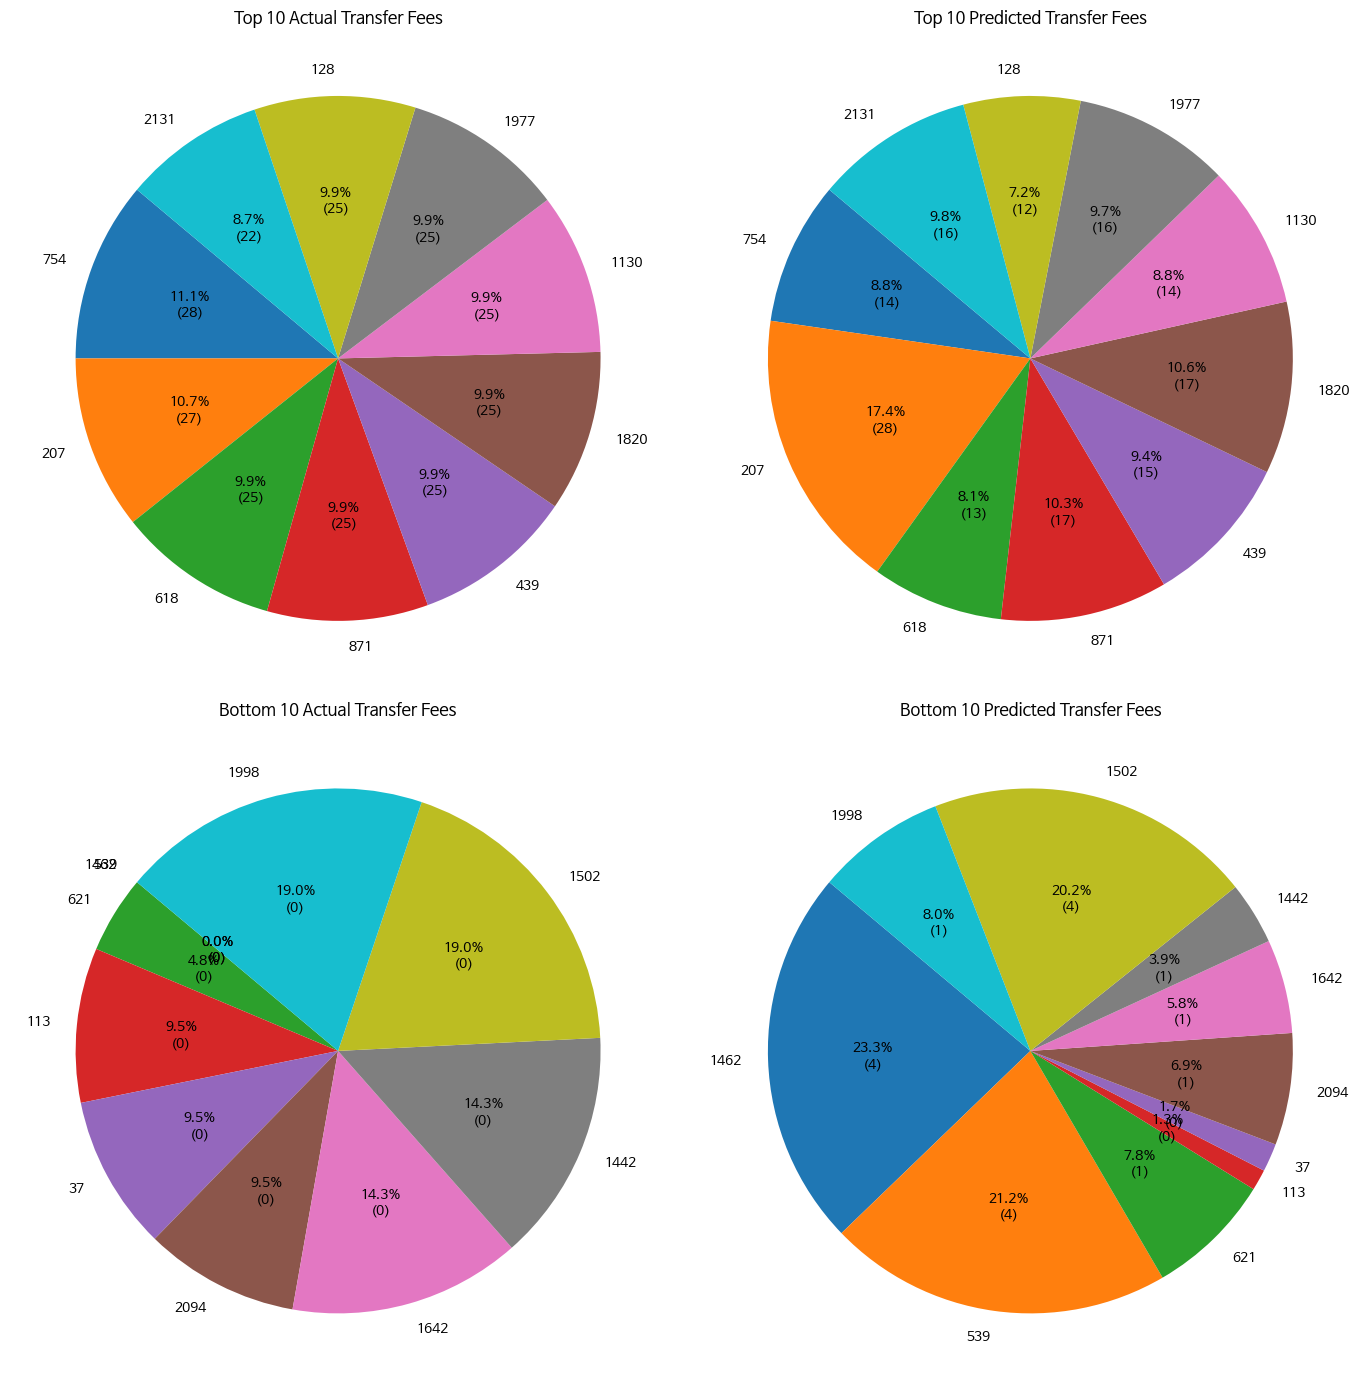

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# 데이터 프레임 예시
# df_cleaned = pd.read_csv('your_data.csv')

# 종속 변수와 독립 변수 설정
X = df_cleaned.drop(['이적료'], axis=1).select_dtypes(include=['float64', 'int64'])  # 이적료를 제외한 숫자형 변수들
y = df_cleaned['이적료']

# statsmodels는 상수 항을 명시적으로 추가해야 함
X = sm.add_constant(X)

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성 및 학습
model = sm.OLS(y_train, X_train).fit()

# 모델 요약 정보 출력
print(model.summary())

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균 제곱 오차 (MSE): {mse}")
print(f"결정 계수 (R^2): {r2}")

# 예측값과 실제값의 차이를 데이터프레임으로 생성
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Residual'] = results['Actual'] - results['Predicted']

# 음수 값을 절대값으로 변환
results = results.abs()

# 상위 10개와 하위 10개 데이터 추출
top_10 = results.nlargest(10, 'Actual')
bottom_10 = results.nsmallest(10, 'Actual')

# 퍼센트와 숫자 표시 함수
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# 시각화
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

# 상위 10개 실제값 파이 차트
ax[0, 0].pie(top_10['Actual'], labels=top_10.index, autopct=lambda pct: func(pct, top_10['Actual']), startangle=140)
ax[0, 0].set_title('Top 10 Actual Transfer Fees')

# 상위 10개 예측값 파이 차트
ax[0, 1].pie(top_10['Predicted'], labels=top_10.index, autopct=lambda pct: func(pct, top_10['Predicted']), startangle=140)
ax[0, 1].set_title('Top 10 Predicted Transfer Fees')

# 하위 10개 실제값 파이 차트
ax[1, 0].pie(bottom_10['Actual'], labels=bottom_10.index, autopct=lambda pct: func(pct, bottom_10['Actual']), startangle=140)
ax[1, 0].set_title('Bottom 10 Actual Transfer Fees')

# 하위 10개 예측값 파이 차트
ax[1, 1].pie(bottom_10['Predicted'], labels=bottom_10.index, autopct=lambda pct: func(pct, bottom_10['Predicted']), startangle=140)
ax[1, 1].set_title('Bottom 10 Predicted Transfer Fees')

plt.tight_layout()
plt.show()
